In [57]:
import pandas as pd
import re
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import typing
import os

# переводим файлик в pandas dataframe

In [60]:
def file_to_pd(file_path:str)-> pd.DataFrame:
    lst = []
    lst2 = []
    with open(file_path) as f:
        for line in f:
            if 'Потом айтензор' in line:
                break
            lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))
        for line in f:
            lst2.append(dict(zip(['n1','n2','Re','Im'], 
                                 list(map(float,re.findall(r'[\d\.e-]+', line)))+[0])))

    df1 = pd.DataFrame(lst[1:])
    df2 = pd.DataFrame(lst2)
    df2 = df2[df2.n1 == df2.n2]
    df2.n1 += 1
    df2.n2 += 1
    df = pd.concat([df1, df2], axis = 0)
    df.sort_values(by = ['n1','n2'], inplace = True)
    df.reset_index(inplace = True, drop =True)
    
    return df


In [61]:
files_list = sorted(list(i for i in os.listdir(os.getcwd()) if '.txt' in i))
files_list

['W3_40_10_3_periodic_superconductive.txt',
 'W3_40_10_3superconductive.txt',
 'W3_40_10_5_periodic_superconductive.txt',
 'W3_40_10_5superconductive.txt',
 'W3_40_15_3_periodic_superconductive.txt',
 'W3_40_15_3superconductive.txt',
 'W3_40_15_5_periodic_superconductive.txt',
 'W3_40_15_5superconductive.txt',
 'W3_40_5_3_periodic_superconductive.txt',
 'W3_40_5_3superconductive.txt',
 'W3_40_5_5_periodic_superconductive.txt',
 'W3_40_5_5superconductive.txt',
 'W4_40_15_5_periodic_superconductive.txt',
 'W4_40_15_5_superconductive.txt',
 'W5_40_15_5_superconductive.txt']

# Как нарисовать корреляции (без Фурье)

In [166]:
# читаем файл

df = file_to_pd(files_list[4])

# Нумерация узлов на решетке такая:
'''
1	5	9	...
2	6	10	...
3	7	11	...
4	8	12	...
'''
''

''

In [168]:
df[(df.n1 == 100) & (df.n2 == 105)]

,n1,n2,Re,Im
7034,100.0,105.0,0.01366,0.0


### Тогда полученные корреляции "Вдоль ноги" номер 2 из центра это узел 82 (для W = 4)

In [126]:
lst = df[(df.n1 == 82) & df.n2.isin(range(82,161,4))].Re.to_list()

0.8321834811601992


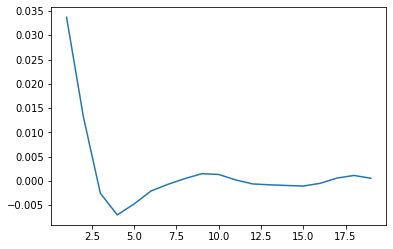

In [127]:
# Здесь взял от узла номер 1, потому что корреляция узла самого с собой около 0.8-0.9 и за ней мало что видно
print(lst[0])
plt.plot(list(range(len(lst)))[1:], lst[1:])

In [135]:
df[(df.n1 == 82) | (df.n2 == 82)]

,n1,n2,Re,Im
81,1.0,82.0,-0.000048,0.0
240,2.0,82.0,-0.000193,0.0
398,3.0,82.0,-0.000278,0.0
555,4.0,82.0,-0.000135,0.0
711,5.0,82.0,0.000039,0.0
...,...,...,...,...
9794,82.0,156.0,0.000276,0.0
9795,82.0,157.0,0.000250,0.0
9796,82.0,158.0,0.000565,0.0
9797,82.0,159.0,0.000491,0.0


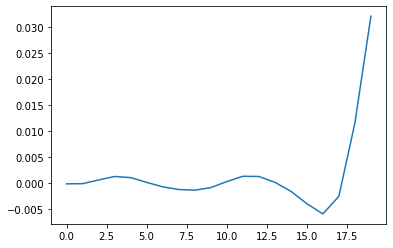

In [137]:
plt.plot(df[(df.n2 == 82) & (df.n1.isin(range(2,82,4)))].Re[:].tolist())

In [129]:
df

,n1,n2,Re,Im
0,1.0,1.0,0.981106,0.0
1,1.0,2.0,0.001140,0.0
2,1.0,3.0,0.001132,0.0
3,1.0,4.0,0.000443,0.0
4,1.0,5.0,0.001000,0.0
...,...,...,...,...
12875,158.0,159.0,0.002885,0.0
12876,158.0,160.0,0.001131,0.0
12877,159.0,159.0,0.947276,0.0
12878,159.0,160.0,0.001140,0.0


# Функция от Tiancheng

(он написал "расчет структурного фактора")

In [141]:
import numpy as np

'''
dx	dy	<Delta⁺_j Delta_i>  --  s-wave
0	0	0.43536001696060 + I * 0.00000000000000
0	1	0.18038227330943 + I * -0.00000000000000
0	2	0.10985737618875 + I * -0.00000000000000
0	3	0.18038227330943 + I * 0.00000000000000
1	0	0.18038227330943 + I * -0.00000000000000
1	1	0.10985737618875 + I * -0.00000000000000
1	2	0.11909652058616 + I * -0.00000000000000
1	3	0.10985737618875 + I * 0.00000000000000
2	0	0.10985737618875 + I * -0.00000000000000
2	1	0.11909652058616 + I * -0.00000000000000
2	2	0.10341090148926 + I * -0.00000000000000
2	3	0.11909652058616 + I * 0.00000000000000
3	0	0.18038227330943 + I * 0.00000000000000
3	1	0.10985737618875 + I * -0.00000000000000
3	2	0.11909652058616 + I * 0.00000000000000
3	3	0.10985737618875 + I * 0.00000000000000
'''

# data = read_corr(file_out, str_to_find) # read the datafile like above
# print(data)
rxs = data[:, 0]
rys = data[:, 1]
corrs = data[:, 2]

lx = 40
ly = 4
pi = np.pi
exp = np.exp
kxarray = np.arange(0, 2 * pi + 0.0001, 2 * pi / lx)
kyarray = np.arange(0, 2 * pi + 0.0001, 2 * pi / ly)

# Sxys = np.full((len(kxarray), len(kyarray)), np.nan)

# for i_kx, kx in enumerate(kxarray):
#     for i_ky, ky in enumerate(kyarray):
#         Sxy = 0
#         for r, corr in enumerate(corrs):
#             rx = rxs[r]
#             ry = rys[r]
#             Sxy = Sxy + corr * exp(1j * (rx * kx + ry * ky))

#         Sxys[i_kx, i_ky, i_sz] = Sxy

In [142]:
len(kxarray)

41

435497.5

392357.22785714286

70000.0

'welcome'

In [62]:
df = file_to_pd('W5_40_15_5_superconductive.txt')

In [63]:
df[(df.n1 == 100) & (df.n2 == 101)]

,n1,n2,Re,Im
29800,100.0,101.0,-0.001917,0.0
29801,100.0,101.0,-0.001917,0.0


In [65]:
df = file_to_pd('W4_40_15_5_superconductive.txt')
df[(df.n1 == 20) & (df.n2 == 21)]

,n1,n2,Re,Im
2870,20.0,21.0,0.00515,0.0


In [66]:
W, L = 4, 40

In [67]:
df

,n1,n2,Re,Im
0,1.0,1.0,0.981106,0.0
1,1.0,2.0,0.001140,0.0
2,1.0,3.0,0.001132,0.0
3,1.0,4.0,0.000443,0.0
4,1.0,5.0,0.001000,0.0
...,...,...,...,...
12875,158.0,159.0,0.002885,0.0
12876,158.0,160.0,0.001131,0.0
12877,159.0,159.0,0.947276,0.0
12878,159.0,160.0,0.001140,0.0


In [68]:
L + L//2

60

In [77]:
def get(df, n1, n2):
    return df[(df.n1 == n1) & (df.n2 == n2)].Re.values

In [81]:
ctr = L + L//2
corr = [get(df, ctr, ctr + i_x) for i_x in range(L//2)]

In [82]:
len(corr)

20

In [119]:
def fourier(df, x0, get=get):
    s = {n_kx:0 for n_kx in range(-L//2 + 1, L//2+1)}
    
    for n_kx in s:
        #print(ctr + n_kx) : 41 ... 80, which is the 2nd leg IIUC
        for i_x in range(L//2):
            kx = 2*np.pi * n_kx / L
            phase = kx * i_x
            term = get(df, x0, x0 + i_x) * np.cos(phase) / L
            s[n_kx] += term
    return s

In [120]:
s = fourier(df, ctr)
s

{-19: array([0.02355606]),
 -18: array([0.02357333]),
 -17: array([0.02356647]),
 -16: array([0.02359411]),
 -15: array([0.02359478]),
 -14: array([0.02363464]),
 -13: array([0.02367135]),
 -12: array([0.0237152]),
 -11: array([0.02376414]),
 -10: array([0.02390318]),
 -9: array([0.02301863]),
 -8: array([0.02291089]),
 -7: array([0.02321795]),
 -6: array([0.02329629]),
 -5: array([0.02334232]),
 -4: array([0.02340173]),
 -3: array([0.02342565]),
 -2: array([0.02394644]),
 -1: array([0.02458006]),
 0: array([0.02396338]),
 1: array([0.02458006]),
 2: array([0.02394644]),
 3: array([0.02342565]),
 4: array([0.02340173]),
 5: array([0.02334232]),
 6: array([0.02329629]),
 7: array([0.02321795]),
 8: array([0.02291089]),
 9: array([0.02301863]),
 10: array([0.02390318]),
 11: array([0.02376414]),
 12: array([0.0237152]),
 13: array([0.02367135]),
 14: array([0.02363464]),
 15: array([0.02359478]),
 16: array([0.02359411]),
 17: array([0.02356647]),
 18: array([0.02357333]),
 19: array([0.

In [121]:
kx = [2*np.pi * n_kx / L for n_kx in s if n_kx >=0]
skx = [s[n_kx] for n_kx in s if n_kx >= 0]

<IPython.core.display.Javascript object>


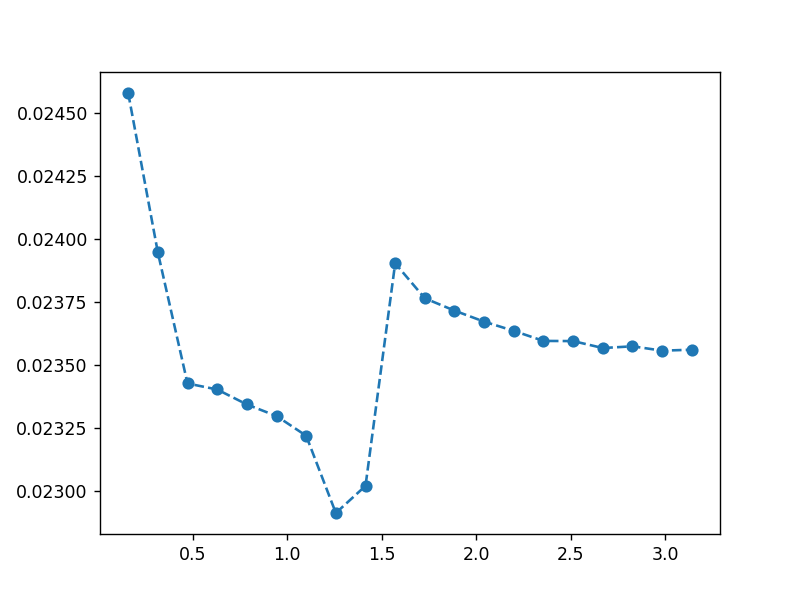

In [124]:
%matplotlib notebook

import matplotlib.pyplot as plt
plt.plot(kx[1:], skx[1:], 'o--')

Nup, Ndown = 15, 5
#plt.axvline()

In [123]:
np.pi *Nup / L, np.pi *Ndown / L, np.pi * (Nup - Ndown) / L

(1.1780972450961724, 0.39269908169872414, 0.7853981633974483)

<IPython.core.display.Javascript object>


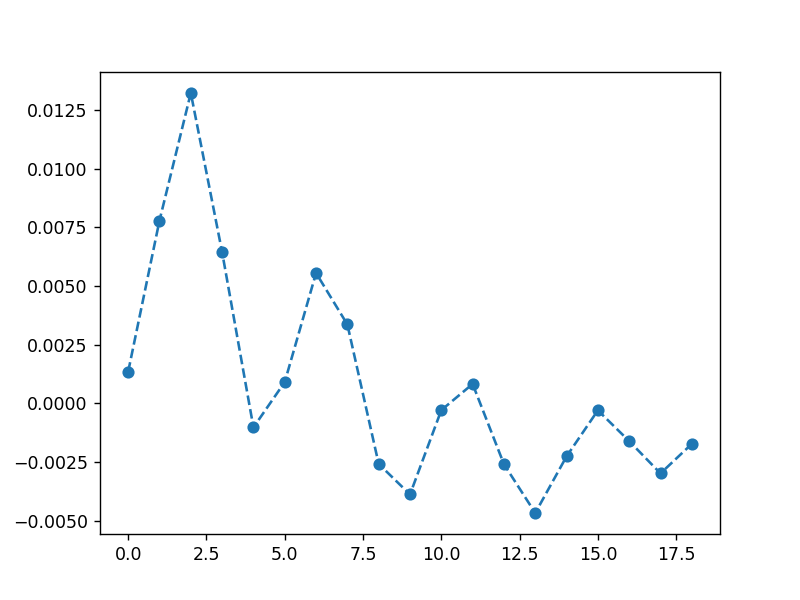

In [132]:
plt.plot(corr[1:], 'o--')